In [1]:
# general python packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib import colormaps
plt.style.use('tableau-colorblind10')

# LSST package for TAP queries
from lsst.rsp import get_tap_service, retrieve_query

In [2]:
service = get_tap_service("ssotap")

In [17]:
def get_obj_matched(objid):

    allsrc_tmp = service.search("SELECT * FROM dp03_catalogs_10yr.DiaSource as diasrc \
                                 JOIN dp03_catalogs_10yr.SSSource as sssrc \
                                 ON diasrc.diaSourceId = sssrc.diaSourceId \
                                 WHERE diasrc.ssObjectId = " + str(objid)).to_table().to_pandas()

    return allsrc_tmp

In [4]:
def xyz_orbit_plot_manyobjects(tobs_list, x_list, y_list, z_list):
    params = {
       'axes.labelsize': 12,
       'font.size': 12,
       'legend.fontsize': 8,
       #   'xtick.labelsize': 16,
       'xtick.major.width': 3,
       'xtick.minor.width': 2,
       'xtick.major.size': 8,
       'xtick.minor.size': 5,
       'xtick.direction': 'in',
       'xtick.top': True,
       'lines.linewidth':3,
       'axes.linewidth':3,
       'axes.labelweight':3,
       'axes.titleweight':3,
       'ytick.major.width':3,
       'ytick.minor.width':2,
       'ytick.major.size': 8,
       'ytick.minor.size': 5,
       'ytick.direction': 'in',
       'ytick.right': True,
       #   'ytick.labelsize': 20,
       'text.usetex': False,
       # 'text.latex.preamble': r'\boldmath',
       'figure.figsize': [6, 6],
       'figure.facecolor': 'white'
       }
    
    plt.rcParams.update(params)
    
    fig = plt.figure()
    fig.subplots_adjust(hspace=0, wspace=0)

    for i in range(len(tobs_list)):
        dist = np.sqrt(x_list[i]**2 + y_list[i]**2 + z_list[i]**2)
        col = (np.random.random(), np.random.random(), np.random.random())

        ax1=plt.subplot(221)
        ax1.plot(x_list[i], z_list[i], '.', color=col, ms=5)
        ax1.set_ylabel('Z (AU)')
        ax1.set_xlabel('X (AU)')
        ax1.minorticks_on()

        ax2=plt.subplot(222, sharey=ax1)
        ax2.plot(y_list[i], z_list[i], '.', color=col, ms=5)
        ax2.set_xlabel('Y (AU)')
        ax2.minorticks_on()
        plt.setp(ax2.get_yticklabels(), visible=False)

        ax3=plt.subplot(223, sharex=ax1)
        ax3.plot(x_list[i], y_list[i], '.', color=col, ms=5)
        ax3.set_ylabel('Y (AU)')
        ax3.set_xlabel('X (AU)')
        ax3.minorticks_on()

    plt.show()

In [5]:
plt.style.use('tableau-colorblind10')
%matplotlib inline

params = {'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [6, 6],
          'figure.facecolor': 'White'
          }
plt.rcParams.update(params)

In [7]:
df_mpc_sso = service.search("SELECT mpc.ssObjectId, mpc.e, mpc.incl, mpc.q, mpc.peri \
                            FROM dp03_catalogs_10yr.MPCORB as mpc \
                            WHERE mpc.incl > 90.0").to_table().to_pandas()

print('The query returned ',len(df_mpc_sso),' results.')

The query returned  11044  results.


In [10]:
df_mpc_sso = service.search("SELECT mpc.ssObjectId, mpc.e, mpc.incl, mpc.q, mpc.peri, \
                            sso.ssObjectId, sso.g_H, sso.r_H, sso.i_H, sso.z_H, sso.y_H \
                            FROM dp03_catalogs_10yr.MPCORB as mpc \
                            JOIN dp03_catalogs_10yr.SSObject as sso \
                            ON mpc.ssObjectId = sso.ssObjectId \
                            WHERE mpc.incl > 90.0").to_table().to_pandas()

print('The query returned ',len(df_mpc_sso),' results.')

The query returned  2687  results.


I think this is telling us that _none_ of the retrograde (i > 90) bodies are detected and cataloged in SSObject?

In [12]:
df_mpc_sso = service.search("SELECT mpc.ssObjectId, mpc.e, mpc.incl, mpc.q, mpc.peri, \
                            sso.ssObjectId, sso.g_H, sso.r_H, sso.i_H, sso.z_H, sso.y_H \
                            FROM dp03_catalogs_10yr.MPCORB as mpc \
                            JOIN dp03_catalogs_10yr.SSObject as sso \
                            ON mpc.ssObjectId = sso.ssObjectId \
                            WHERE sso.numObs > 150 AND mpc.q < 1.1").to_table().to_pandas()
#                            WHERE sso.numObs > 50 AND (mpc.q < 1.6 OR mpc.q > 3.5)").to_table().to_pandas()
#                             WHERE sso.numObs > 50 AND mpc.e > 0.98").to_table().to_pandas()
#                             WHERE mpc.incl > 90.0").to_table().to_pandas()

print('The query returned ',len(df_mpc_sso),' results.')

The query returned  1765  results.


In [13]:
df_mpc_sso

,ssObjectId,e,incl,q,peri,ssObjectId2,g_H,r_H,i_H,z_H,y_H
0,-5234750409166262016,0.435987,11.883250,1.080947,26.482780,-5234750409166262016,18.141359,17.499477,17.297379,17.350624,NaN
1,7991128850154218427,0.763999,1.321700,0.441069,43.544950,7991128850154218427,19.550732,18.916409,18.710812,18.776417,NaN
2,-7789613295760699323,0.623179,6.067580,0.622294,92.792371,-7789613295760699323,18.261578,17.636629,17.455847,17.506680,NaN
3,8551587316774204226,0.712520,2.521620,0.625595,98.377330,8551587316774204226,16.118109,15.459065,15.249735,15.303591,NaN
4,-2686348740622689257,0.436676,9.382600,0.769900,127.291143,-2686348740622689257,15.087029,14.425168,14.244156,14.255156,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,6657481975898767980,0.995465,21.054269,0.222167,160.786528,6657481975898767980,15.558676,15.175577,15.086062,15.033539,NaN
1761,-34358999358465183,0.993783,123.601655,0.290397,97.261624,-34358999358465183,15.520044,15.011393,14.900069,14.883533,NaN
1762,839293102145863133,0.995629,161.278282,0.827546,114.227084,839293102145863133,16.462843,15.831499,15.878825,15.771560,NaN
1763,7264461566670500351,0.996989,8.003656,0.105071,123.434149,7264461566670500351,15.555058,15.086477,14.975512,14.949790,NaN


In [57]:
#ind = 4 # 8 is interesting
#src_cat_obj = get_obj_matched(df_mpc_sso.ssObjectId.values[ind])

nobj_to_plot = 1
pick_obj = df_mpc_sso.sample(nobj_to_plot)
src_cat_obj = get_obj_matched(pick_obj.ssObjectId.values[0])

In [58]:
src_cat_obj['dt'] = src_cat_obj.midPointMjdTai.diff()
src_cat_obj['vhelio_tot'] = np.sqrt(src_cat_obj.heliocentricVX**2 + src_cat_obj.heliocentricVY**2 + src_cat_obj.heliocentricVZ**2)
src_cat_obj['dv'] = src_cat_obj.vhelio_tot.diff()
src_cat_obj['vtopo_tot'] = np.sqrt(src_cat_obj.topocentricVX**2 + src_cat_obj.topocentricVY**2 + src_cat_obj.topocentricVZ**2)
src_cat_obj['dv_topo'] = src_cat_obj.vtopo_tot.diff()

In [59]:
dv = src_cat_obj.dv.values*u.au/u.second
dv_km = dv.to(u.km/u.second)
dv_topo = src_cat_obj.dv_topo.values*u.au/u.second
dv_topo_km = dv_topo.to(u.km/u.second)
dt = src_cat_obj.dt.values*u.day
dt_sec = dt.to(u.second)

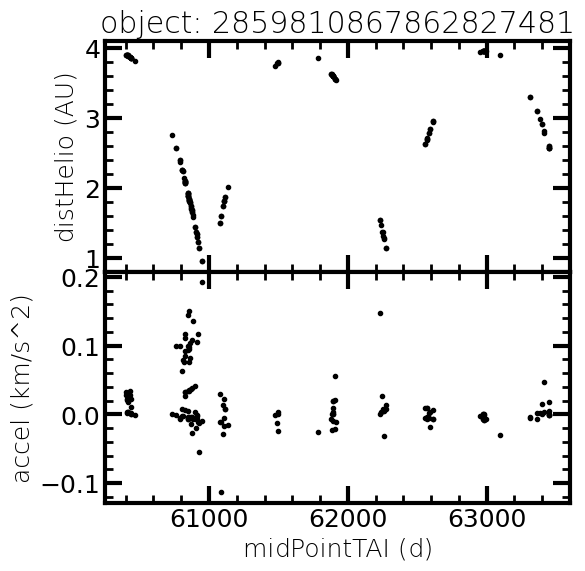

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
fig.subplots_adjust(hspace = 0)

axs[0].plot(src_cat_obj.midPointMjdTai, src_cat_obj.heliocentricDist, 'k.')
axs[0].set_title('object: '+str(pick_obj.ssObjectId.values[0]))
axs[0].set_ylabel('distHelio (AU)')
axs[0].minorticks_on()

axs[1].plot(src_cat_obj.midPointMjdTai, dv_km/dt_sec, 'k.')
#plt.plot(src_cat_obj.midPointTai, src_cat_obj.dv/(src_cat_obj.dt/365.25), 'k.')
axs[1].set_xlabel('midPointTAI (d)')
axs[1].set_ylabel('accel (km/s^2)')
#plt.ylabel('acceleration (AU/yr^2)')
axs[1].minorticks_on()
plt.show()
# plt.savefig('accel_earth_interaction.png')

# Object I liked:

-6115250865060496703

In [36]:
#nobj_to_plot = 10
#pick_obj = df_mpc_sso[inner_belt].sample(nobj_to_plot)

pick_obj_torb = []
pick_obj_x = []
pick_obj_y = []
pick_obj_z = []

for i in range(len(df_mpc_sso)):
    src_cat_obj = get_obj_matched(df_mpc_sso.ssObjectId.values[i])
    pick_obj_torb.append(src_cat_obj['midPointMjdTai'])
    pick_obj_x.append(src_cat_obj['heliocentricX'])
    pick_obj_y.append(src_cat_obj['heliocentricY'])
    pick_obj_z.append(src_cat_obj['heliocentricZ'])


KeyboardInterrupt: 

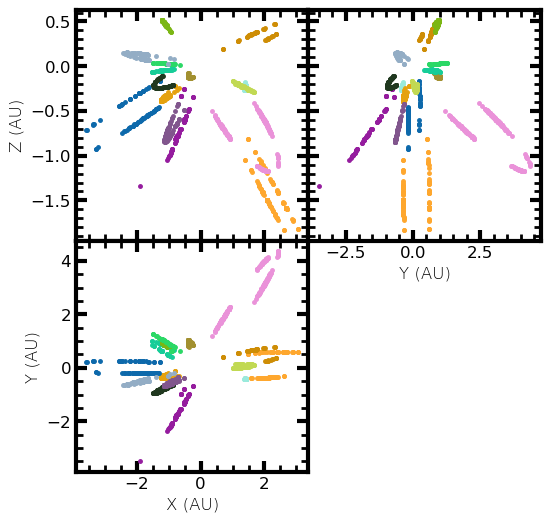

In [184]:
xyz_orbit_plot_manyobjects(pick_obj_torb, pick_obj_x, pick_obj_y, pick_obj_z)